## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg


----


## Setup


### Importing Required Libraries


In [121]:
# Import Libraries

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

## Task 1 - Load the data in a csv file into a dataframe


In [88]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

In [89]:
df

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American
...,...,...,...,...,...,...,...,...
387,31.0,4,91.0,68,1970,17.6,82,Japanese
388,37.0,4,91.0,68,2025,18.2,82,Japanese
389,36.0,4,120.0,88,2160,14.5,82,Japanese
390,32.0,4,144.0,96,2665,13.9,82,Japanese


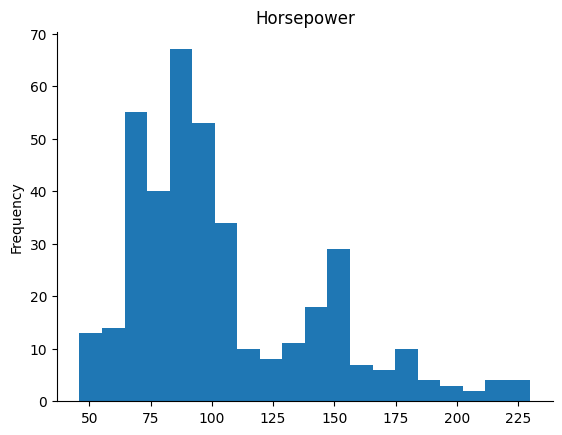

In [90]:
from matplotlib import pyplot as plt
df['Horsepower'].plot(kind='hist', bins=20, title='Horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

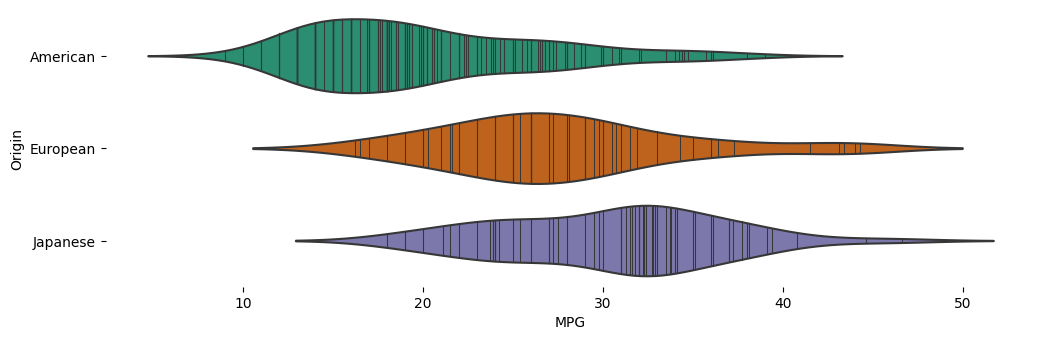

In [91]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Origin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='MPG', y='Origin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

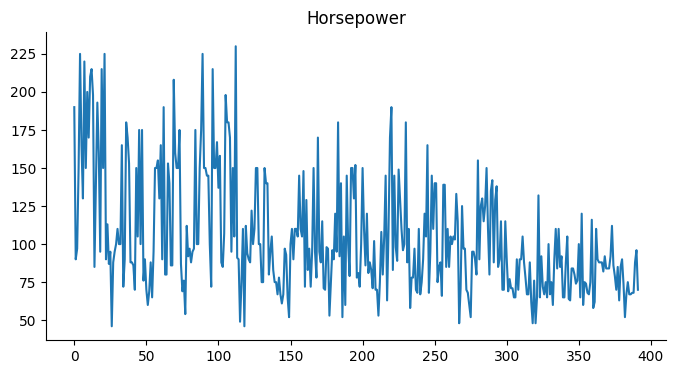

In [92]:
from matplotlib import pyplot as plt
df['Horsepower'].plot(kind='line', figsize=(8, 4), title='Horsepower')
plt.gca().spines[['top', 'right']].set_visible(False)

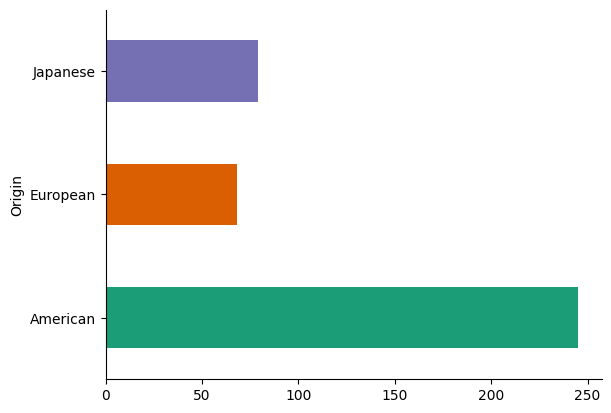

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Origin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Horsepower', ylabel='MPG'>

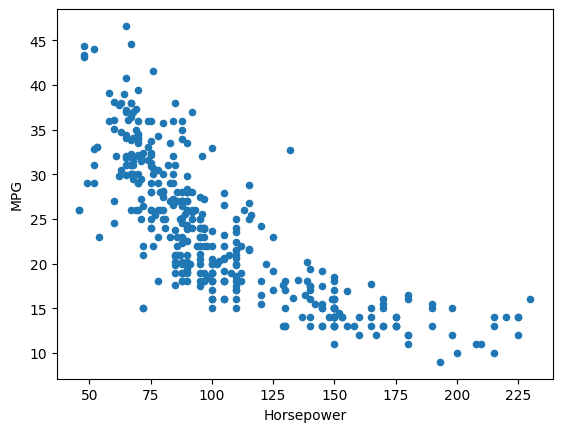

In [94]:
df.plot.scatter(x = "Horsepower", y = "MPG")

In [95]:
df.shape

(392, 8)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MPG          392 non-null    float64
 1   Cylinders    392 non-null    int64  
 2   Engine Disp  392 non-null    float64
 3   Horsepower   392 non-null    int64  
 4   Weight       392 non-null    int64  
 5   Accelerate   392 non-null    float64
 6   Year         392 non-null    int64  
 7   Origin       392 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 24.6+ KB


df['Origin'] = df['Origin'].fillna(0)


In [97]:

X = df.drop(['MPG','Origin'], axis=1, inplace=False)
print('X Data is \n' , X.head())
print('X shape is ' , X.shape)


X Data is 
    Cylinders  Engine Disp  Horsepower  Weight  Accelerate  Year
0          8        390.0         190    3850         8.5    70
1          6        199.0          90    2648        15.0    70
2          6        199.0          97    2774        15.5    70
3          8        304.0         150    3433        12.0    70
4          8        455.0         225    3086        10.0    70
X shape is  (392, 6)


In [98]:
y = df['MPG']
y

0      15.0
1      21.0
2      18.0
3      16.0
4      14.0
       ... 
387    31.0
388    37.0
389    36.0
390    32.0
391    34.0
Name: MPG, Length: 392, dtype: float64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)


# 'errors='coerce'' will convert non-numeric values to NaN


In [100]:
df

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American
...,...,...,...,...,...,...,...,...
387,31.0,4,91.0,68,1970,17.6,82,Japanese
388,37.0,4,91.0,68,2025,18.2,82,Japanese
389,36.0,4,120.0,88,2160,14.5,82,Japanese
390,32.0,4,144.0,96,2665,13.9,82,Japanese


In [101]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
print('----------------------------------------------------')

y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])



Linear Regression Train Score is :  0.797820768159934
Linear Regression Test Score is :  0.8443741741719626
Linear Regression Coef is :  [-0.29233906  0.00957021 -0.00768647 -0.00673539  0.06898605  0.75008197]
Linear Regression intercept is :  -14.115788977729714
----------------------------------------------------
Predicted Value for Linear Regression is :  [20.26327088 20.70015528 30.98495666 20.53571425 30.97957074 31.72752418
 24.19381107 32.57745195 31.25939468 30.94382796]


#Applying Lasso Regression Model


In [108]:

LassoRegressionModel = Lasso(alpha=1)
LassoRegressionModel.fit(X_train, y_train)

print('Lasso Regression Train Score is : ' , LassoRegressionModel.score(X_train, y_train))
print('Lasso Regression Test Score is : ' , LassoRegressionModel.score(X_test, y_test))
print('Lasso Regression Coef is : ' , LassoRegressionModel.coef_)
print('Lasso Regression intercept is : ' , LassoRegressionModel.intercept_)
print('----------------------------------------------------')

y_pred = LassoRegressionModel.predict(X_test)
print('Predicted Value for Lasso Regression is : ' , y_pred[:10])



Lasso Regression Train Score is :  0.7955950274697308
Lasso Regression Test Score is :  0.8416884411111116
Lasso Regression Coef is :  [-0.          0.0017941  -0.01170231 -0.00641101  0.          0.65752762]
Lasso Regression intercept is :  -6.658351311644058
----------------------------------------------------
Predicted Value for Lasso Regression is :  [20.78656911 21.18915346 30.87187548 20.43753446 30.98668061 31.07567777
 23.7962084  32.39366919 30.85159924 30.57033379]


#Applying Ridge Regression Model


In [111]:

RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RidgeRegressionModel.fit(X_train, y_train)

print('Ridge Regression Train Score is : ' , RidgeRegressionModel.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , RidgeRegressionModel.score(X_test, y_test))
print('Ridge Regression Coef is : ' , RidgeRegressionModel.coef_)
print('Ridge Regression intercept is : ' , RidgeRegressionModel.intercept_)
print('----------------------------------------------------')

y_pred = RidgeRegressionModel.predict(X_test)
print('Predicted Value for Ridge Regression is : ' , y_pred[:10])
print('----------------------------------------------------')


Ridge Regression Train Score is :  0.797820705664416
Ridge Regression Test Score is :  0.8443663598474092
Ridge Regression Coef is :  [-0.28894538  0.00951751 -0.00768504 -0.00673576  0.06896326  0.74985285]
Ridge Regression intercept is :  -14.105453440849928
----------------------------------------------------
Predicted Value for Ridge Regression is :  [20.26304946 20.70530407 30.98419601 20.5376811  30.97955839 31.72557144
 24.19255069 32.5774707  31.25790733 30.94100654]
----------------------------------------------------


#Applying Random Forest Regressor Model


In [114]:

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Random Forest Regressor Train Score is :  0.7885789798235524
Random Forest Regressor Test Score is :  0.7615786202697129
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [25.29413948 18.64742174 31.77986806 16.932099   31.93525752 25.91635384
 20.19233388 33.09479376 28.27927604 26.62717495]


#Applying SVR Model


In [116]:

SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])


SVRModel Train Score is :  0.6673084107043958
SVRModel Test Score is :  0.6694141787885322
----------------------------------------------------
Predicted Value for SVRModel is :  [22.38705174 20.11652574 27.98976642 16.80793924 28.12938407 26.34645093
 18.50546688 28.80518702 26.66816163 26.39224103]



#----------------------------------------------------
#Applying KNeighborsRegressor Model

'''
sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=, algorithm=’auto’, leaf_size=30,
                                      p=2, metric=’minkowski’, metric_params=None,n_jobs=None)
'''


In [117]:

KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform', #also can be : distance, or defined function
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsRegressorModel.fit(X_train, y_train)

#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNeighborsRegressorModel.predict(X_test)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred[:10])

KNeighborsRegressorModel Train Score is :  0.807333930280229
KNeighborsRegressorModel Test Score is :  0.7277354624735146
----------------------------------------------------
Predicted Value for KNeighborsRegressorModel is :  [25.72 19.5  32.66 18.2  32.98 23.78 18.   33.96 27.86 21.78]


#Applying KNeighborsRegressor Model

'''
sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights=, algorithm=’auto’, leaf_size=30,
                                      p=2, metric=’minkowski’, metric_params=None,n_jobs=None)
'''


In [119]:

KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform', #also can be : distance, or defined function
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsRegressorModel.fit(X_train, y_train)

#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNeighborsRegressorModel.predict(X_test)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred)

KNeighborsRegressorModel Train Score is :  0.807333930280229
KNeighborsRegressorModel Test Score is :  0.7277354624735146
----------------------------------------------------
Predicted Value for KNeighborsRegressorModel is :  [25.72 19.5  32.66 18.2  32.98 23.78 18.   33.96 27.86 21.78 37.3  14.5
 28.5  14.8  25.84 14.68 29.74 25.78 17.9  25.08 15.28 26.3  26.94 22.76
 12.2  33.7  13.8  23.58 23.94 14.2  18.68 20.96 34.44 23.2  29.42 26.44
 33.12 15.5  34.86 14.8  13.2  19.28 30.04 27.8  20.78 26.28 23.3  33.8
 27.06 18.96 23.64 19.08 26.   25.04 18.8  13.8  16.1  18.96 22.28 24.34
 31.24 30.16 17.8  14.5  31.74 25.4  34.86 25.64 27.4  19.48 18.62 20.2
 36.28 23.78 23.44 13.2  17.04 28.76 13.8 ]




#----------------------------------------------------
#Applying DecisionTreeRegressor Model

'''

In [122]:


DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

DecisionTreeRegressor Train Score is :  0.8313548997109894
DecisionTreeRegressor Test Score is :  0.8041643719034978
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [24.61408451 18.93606557 36.41470588 18.63333333 36.41470588 29.54242424
 26.12       36.41470588 29.54242424 29.54242424]
